In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('women_violence.csv')
df

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
0,1,Afghanistan,F,Marital status,Never married,... if she burns the food,01/01/2015,NaN
1,1,Afghanistan,F,Education,Higher,... if she burns the food,01/01/2015,10.1
2,1,Afghanistan,F,Education,Secondary,... if she burns the food,01/01/2015,13.7
3,1,Afghanistan,F,Education,Primary,... if she burns the food,01/01/2015,13.8
4,1,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,01/01/2015,13.8
...,...,...,...,...,...,...,...,...
12595,210,Zimbabwe,M,Residence,Urban,... if she goes out without telling him,01/01/2015,11.8
12596,280,Zimbabwe,M,Residence,Rural,... if she neglects the children,01/01/2015,20.1
12597,280,Zimbabwe,M,Residence,Urban,... if she neglects the children,01/01/2015,15.0
12598,350,Zimbabwe,M,Residence,Rural,... if she refuses to have sex with him,01/01/2015,7.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12600 entries, 0 to 12599
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RecordID               12600 non-null  int64  
 1   Country                12600 non-null  object 
 2   Gender                 12600 non-null  object 
 3   Demographics Question  12600 non-null  object 
 4   Demographics Response  12600 non-null  object 
 5   Question               12600 non-null  object 
 6   Survey Year            12600 non-null  object 
 7   Value                  11187 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 787.6+ KB


In [4]:
for col in df.columns:
  print(f"Unique values in '{col}':")
  print(df[col].unique())
  print("-" * 30)

Unique values in 'RecordID':
[  1 351  71 141 211 281   2 352  72 142 212 282   3 353  73 143 213 283
   4 354  74 144 214 284   5 355  75 145 215 285   6 356  76 146 216 286
   7 357  77 147 217 287   8 358  78 148 218 288   9 359  79 149 219 289
  10 360  80 150 220 290  11 361  81 151 221 291  12 362  82 152 222 292
  13 363  83 153 223 293  14 364  84 154 224 294  15 365  85 155 225 295
  16 366  86 156 226 296  17 367  87 157 227 297  18 368  88 158 228 298
  19 369  89 159 229 299  20 370  90 160 230 300  21 371  91 161 231 301
  22 372  92 162 232 302  23 373  93 163 233 303  24 374  94 164 234 304
  25 375  95 165 235 305  26 376  96 166 236 306  27 377  97 167 237 307
  28 378  98 168 238 308  29 379  99 169 239 309  30 380 100 170 240 310
  31 381 101 171 241 311  32 382 102 172 242 312  33 383 103 173 243 313
  34 384 104 174 244 314 385 105  35 175 245 315 386 106  36 176 246 316
 387 107  37 177 247 317 388 108  38 178 248 318 389 109  39 179 249 319
 390 110  40 180 250 3

In [8]:
median_value = df['Value'].median()
df['Value'] = df['Value'].fillna(median_value)

In [12]:
df['Survey Year'] = pd.to_datetime(df['Survey Year'], format='%d/%m/%Y')


In [17]:
fig = px.box(df, x='Demographics Question', y='Value', title='Distribution of Value by Demographics Question')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [16]:
gender_counts = df['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']

fig = px.pie(gender_counts, values='Count', names='Gender', title='Distribution of Gender')
fig.show()

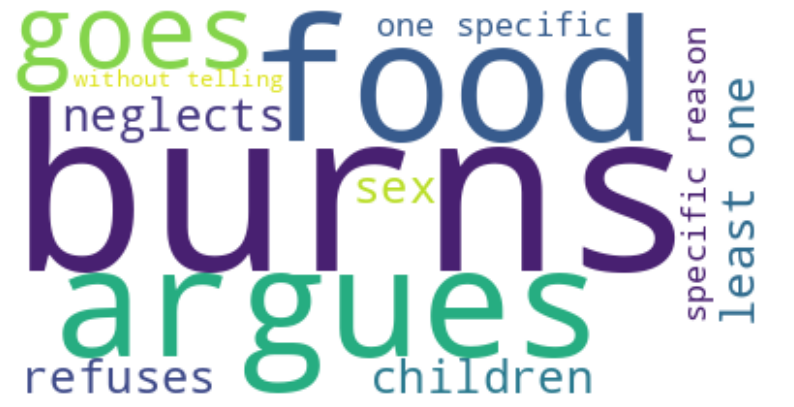

In [15]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all questions into a single string
text = " ".join(review for review in df.Question)

# Create stopword list:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
df_question_avg = df.groupby('Question')['Value'].mean().reset_index()

fig = px.bar(df_question_avg, x='Question', y='Value', title='Average Value by Question')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [13]:
import plotly.express as px

df_yearly_avg = df.groupby('Survey Year')['Value'].mean().reset_index()

fig = px.line(df_yearly_avg, x='Survey Year', y='Value', title='Average Value Over Years')
fig.show()

In [19]:
import plotly.express as px

# Group by Demographics Question and Demographics Response and calculate the mean Value
df_sunburst_data = df.groupby(['Demographics Question', 'Demographics Response'])['Value'].mean().reset_index()

# Create the sunburst chart
fig = px.sunburst(df_sunburst_data,
                  path=['Demographics Question', 'Demographics Response'],
                  values='Value',
                  title='Average Value by Demographics Hierarchy')

fig.show()

In [18]:
import plotly.express as px

# Group by Demographics Question and Question and calculate the mean Value
df_heatmap_data = df.groupby(['Demographics Question', 'Question'])['Value'].mean().reset_index()

# Create a pivot table for the heatmap
heatmap_data = df_heatmap_data.pivot(index='Demographics Question', columns='Question', values='Value')

# Create the heatmap
fig = px.imshow(heatmap_data,
                labels=dict(x="Question", y="Demographics Question", color="Average Value"),
                x=heatmap_data.columns,
                y=heatmap_data.index,
                title="Average Value by Demographics Question and Question")

fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [20]:
fig = px.violin(df, x='Country', y='Value', title='Distribution of Value by Country')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

## Grouped bar chart of average value by demographics question and gender

### Subtask:
Generate a grouped bar chart to compare the average 'Value' for each 'Demographics Question' category, separated by 'Gender'.


**Reasoning**:
Group the data by 'Demographics Question' and 'Gender', calculate the mean of 'Value', and prepare the data for plotting.



In [23]:
df_grouped_gender = df.groupby(['Demographics Question', 'Gender'])['Value'].mean().reset_index()

**Reasoning**:
Create a grouped bar chart using the grouped data to visualize the average 'Value' by 'Demographics Question' and 'Gender'.



In [22]:
fig = px.bar(df_grouped_gender, x='Demographics Question', y='Value', color='Gender',
             title='Average Value by Demographics Question and Gender', barmode='group')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

## Stacked bar chart of demographics response within demographics question

### Subtask:
Create a stacked bar chart to show the proportion of different responses within each 'Demographics Question' category.


**Reasoning**:
Calculate the counts of each 'Demographics Response' within each 'Demographics Question' and store it in a new DataFrame.



In [24]:
df_stacked_bar_data = df.groupby(['Demographics Question', 'Demographics Response']).size().reset_index(name='Count')

**Reasoning**:
Create a stacked bar chart using the calculated counts, set the title, rotate x-axis labels, and display the chart.



In [25]:
fig = px.bar(df_stacked_bar_data, x='Demographics Question', y='Count', color='Demographics Response',
             title='Distribution of Demographics Responses within Demographics Questions')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

## Line chart of average value over time for specific countries or demographics

### Subtask:
Generate line charts to compare the trends of average 'Value' over time for a selection of countries or demographic groups.


**Reasoning**:
Filter the dataframe for a few countries and calculate the average value over the years for these countries.



In [26]:
selected_countries = ['India', 'Nigeria', 'Brazil', 'Pakistan']
df_filtered_countries = df[df['Country'].isin(selected_countries)]
df_yearly_country_avg = df_filtered_countries.groupby(['Survey Year', 'Country'])['Value'].mean().reset_index()

**Reasoning**:
Generate a line chart to visualize the average value over time for the selected countries.



In [28]:
selected_demographics = ['Higher', 'No education', 'Rural', 'Urban']
df_filtered_demographics = df[df['Demographics Response'].isin(selected_demographics)]
df_yearly_demographics_avg = df_filtered_demographics.groupby(['Survey Year', 'Demographics Response'])['Value'].mean().reset_index()

**Reasoning**:
Generate a line chart to visualize the average value over time for the selected demographic responses.



In [29]:
fig = px.line(df_yearly_demographics_avg, x='Survey Year', y='Value', color='Demographics Response',
              title='Average Value Over Years for Selected Demographics Responses')
fig.show()